<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Periodismo de datos</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencias de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>


# Periodismo de datos: Análisis y visualización de los datos

En este script de python se pretende:

1. **Preparar los datos para ser analizados**
2. **Analizar los datos**
3. **Visualizar los datos**


In [108]:
#IMPORTS. 

import pandas as pd
import matplotlib.pyplot as plt

## 1. Carga y preparación de los datos

Procedemos a cargar el fichero excel 25721.xls, que contiene los menores condenados anuales según el sexo, la edad y la nacionalidad de los años 2018 a 2013, tratando las comas como decimales. Los datos se han extraido del instituto nacional de estadistica, en el siguiente link: https://www.ine.es/jaxiT3/Tabla.htm?t=25721&L=0

In [109]:
data = pd.read_excel('./data_sources/25721.xls',usecols=range(0,7),decimal=",")

In [110]:
df_Total=data.iloc[:54]
df_hombres=data.iloc[56:104]
df_mujeres=data.iloc[105:153]

Procedemos a crear el dataframe de hombres:

In [111]:
list_nationality=[]
list_indexes_to_remove=[]
for i in range(0,df_hombres.shape[0],6):
    list_indexes_to_remove.append(i)
    for j in range(0,6):
        list_nationality.append(df_hombres.iloc[i,0])
df_hombres=df_hombres.assign(Nationality = list_nationality)
df_hombres.index=range(48)
df_hombres=df_hombres.drop(list_indexes_to_remove)
df_hombres=df_hombres.replace(to_replace ="                14 años", 
                 value =14) 
df_hombres=df_hombres.replace(to_replace ="                15 años", 
                 value =15) 
df_hombres=df_hombres.replace(to_replace ="                16 años", 
                 value =16) 
df_hombres=df_hombres.replace(to_replace ="                17 años", 
                 value =17) 
df_hombres.index=range(40)
df_hombres.columns=['Age','2018','2017','2016','2015','2014','2013','Nationality']
list_sex=[]
for j in range(0,40):
    list_sex.append('hombre')
df_hombres=df_hombres.assign(sex = list_sex)
df_hombres.head(10)

,Age,2018,2017,2016,2015,2014,2013,Nationality,sex
0,Total,10753.0,10819.0,10346.0,11141.0,12147.0,11988.0,Total,hombre
1,14,1899.0,1816.0,1712.0,1878.0,1944.0,1853.0,Total,hombre
2,15,2351.0,2457.0,2444.0,2494.0,2706.0,2627.0,Total,hombre
3,16,3119.0,3125.0,2935.0,3143.0,3423.0,3462.0,Total,hombre
4,17,3384.0,3421.0,3255.0,3626.0,4074.0,4046.0,Total,hombre
5,Total,8567.0,8508.0,8100.0,8658.0,9315.0,8902.0,Española,hombre
6,14,1612.0,1494.0,1398.0,1560.0,1566.0,1430.0,Española,hombre
7,15,1898.0,2000.0,1950.0,1978.0,2089.0,1974.0,Española,hombre
8,16,2456.0,2400.0,2296.0,2352.0,2575.0,2537.0,Española,hombre
9,17,2601.0,2614.0,2456.0,2768.0,3085.0,2961.0,Española,hombre


Procedemos a crear el dataframe de mujeres:

In [112]:
list_nationality=[]
list_indexes_to_remove=[]
for i in range(0,df_mujeres.shape[0],6):
    list_indexes_to_remove.append(i)
    for j in range(0,6):
        list_nationality.append(df_mujeres.iloc[i,0])
df_mujeres
df_mujeres=df_mujeres.assign(Nationality = list_nationality)
df_mujeres.index=range(48)
df_mujeres=df_mujeres.drop(list_indexes_to_remove)
df_mujeres=df_mujeres.replace(to_replace ="                14 años", 
                 value =14) 
df_mujeres=df_mujeres.replace(to_replace ="                15 años", 
                 value =15) 
df_mujeres=df_mujeres.replace(to_replace ="                16 años", 
                 value =16) 
df_mujeres=df_mujeres.replace(to_replace ="                17 años", 
                 value =17) 
df_mujeres.index=range(40)
df_mujeres.columns=['Age','2018','2017','2016','2015','2014','2013','Nationality']
list_sex=[]
for j in range(0,40):
    list_sex.append('mujer')
df_mujeres=df_mujeres.assign(sex = list_sex)
df_mujeres.head(10)

,Age,2018,2017,2016,2015,2014,2013,Nationality,sex
0,Total,2911.0,2824.0,2582.0,2840.0,2901.0,2756.0,Total,mujer
1,14,681.0,607.0,550.0,562.0,614.0,550.0,Total,mujer
2,15,729.0,760.0,675.0,712.0,710.0,696.0,Total,mujer
3,16,794.0,786.0,705.0,786.0,800.0,757.0,Total,mujer
4,17,707.0,671.0,652.0,780.0,777.0,753.0,Total,mujer
5,Total,2595.0,2485.0,2240.0,2470.0,2449.0,2310.0,Española,mujer
6,14,620.0,538.0,496.0,496.0,526.0,456.0,Española,mujer
7,15,640.0,677.0,583.0,637.0,611.0,590.0,Española,mujer
8,16,705.0,683.0,617.0,683.0,672.0,642.0,Española,mujer
9,17,630.0,587.0,544.0,654.0,640.0,622.0,Española,mujer


Procedemos a crear el dataframe final (uniendo hombres y mujeres):

In [113]:
dataset=pd.concat([df_mujeres,df_hombres])
dataset=dataset[dataset['Age'] != "                Total"]
dataset=dataset[dataset['Nationality'] != "    Total"]
dataset.index=range(56)
dataset

,Age,2018,2017,2016,2015,2014,2013,Nationality,sex
0,14,620.0,538.0,496.0,496.0,526.0,456.0,Española,mujer
1,15,640.0,677.0,583.0,637.0,611.0,590.0,Española,mujer
2,16,705.0,683.0,617.0,683.0,672.0,642.0,Española,mujer
3,17,630.0,587.0,544.0,654.0,640.0,622.0,Española,mujer
4,14,24.0,26.0,19.0,34.0,34.0,37.0,País de la Unión Europea sin España,mujer
5,15,37.0,33.0,41.0,29.0,39.0,31.0,País de la Unión Europea sin España,mujer
6,16,34.0,32.0,39.0,33.0,40.0,32.0,País de la Unión Europea sin España,mujer
7,17,21.0,35.0,31.0,43.0,47.0,46.0,País de la Unión Europea sin España,mujer
8,14,1.0,2.0,4.0,1.0,3.0,4.0,País del resto de Europa,mujer
9,15,1.0,2.0,2.0,4.0,5.0,7.0,País del resto de Europa,mujer


Guardamos el dataframe final en un excel llamado output_condenas_menores.xlsx:

In [114]:
dataset.to_excel("./generated_output/output_condenas_menores.xlsx")

## 2. Analisis de los datos

Procedemos a analizar los datos de los menores condenados. 

In [115]:
print(dataset.sum())
print(dataset.mean())

Age                                                          868
2018                                                       13664
2017                                                       13643
2016                                                       12928
2015                                                       13981
2014                                                       15048
2013                                                       14744
Nationality        Española    Española    Española    Españo...
sex            mujermujermujermujermujermujermujermujermujerm...
dtype: object
Age      15.500000
2018    244.000000
2017    243.625000
2016    230.857143
2015    249.660714
2014    268.714286
2013    263.285714
dtype: float64


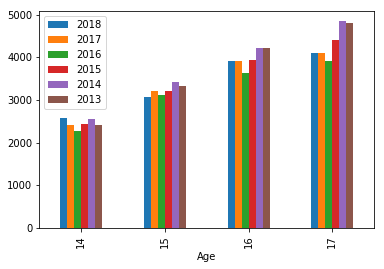

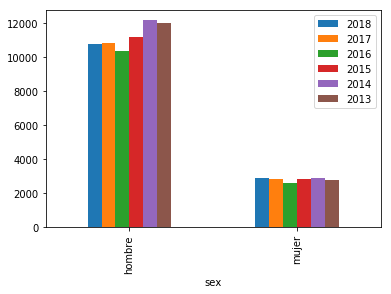

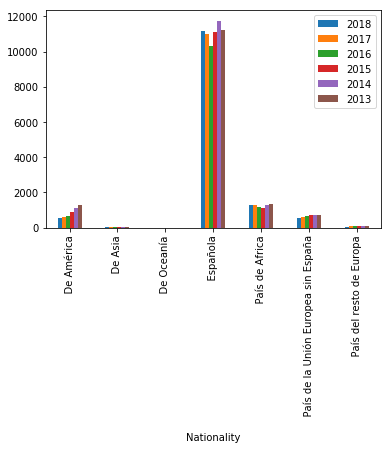

In [116]:
dataset.groupby('Age').sum().plot(kind='bar') 
plt.show()

dataset.groupby('sex').sum().plot(kind='bar') 
plt.show()

dataset.groupby('Nationality').sum().plot(kind='bar')
plt.show()